# PROBLEM STATEMENT

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [Test Data Import & Cleaning](#Test-Data-Import-&-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)

# 2. Test Data Import & Cleaning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats

#to display all the columns in the dataset
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 300)

%matplotlib inline

In [2]:
test_df = pd.read_csv("../datasets/test.csv")

In [3]:
print(test_df.shape)

(879, 80)


In [4]:
test_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               879 non-null    int64  
 1   PID              879 non-null    int64  
 2   MS SubClass      879 non-null    int64  
 3   MS Zoning        879 non-null    object 
 4   Lot Frontage     719 non-null    float64
 5   Lot Area         879 non-null    int64  
 6   Street           879 non-null    object 
 7   Alley            58 non-null     object 
 8   Lot Shape        879 non-null    object 
 9   Land Contour     879 non-null    object 
 10  Utilities        879 non-null    object 
 11  Lot Config       879 non-null    object 
 12  Land Slope       879 non-null    object 
 13  Neighborhood     879 non-null    object 
 14  Condition 1      879 non-null    object 
 15  Condition 2      879 non-null    object 
 16  Bldg Type        879 non-null    object 
 17  House Style     

> To take note Columns that the entries which non-null is lesser than 2051.

In [6]:
test_df.isnull().sum().sort_values(ascending=False).head(30)

Pool QC           875
Misc Feature      838
Alley             821
Fence             707
Fireplace Qu      422
Lot Frontage      160
Garage Cond        45
Garage Qual        45
Garage Yr Blt      45
Garage Finish      45
Garage Type        44
Bsmt Exposure      25
BsmtFin Type 1     25
Bsmt Qual          25
BsmtFin Type 2     25
Bsmt Cond          25
Mas Vnr Area        1
Mas Vnr Type        1
Electrical          1
Overall Cond        0
Exter Qual          0
Exter Cond          0
Foundation          0
Exterior 2nd        0
Exterior 1st        0
Roof Matl           0
Roof Style          0
Year Remod/Add      0
Year Built          0
Sale Type           0
dtype: int64

In [7]:
na_features =[x for x in test_df.columns if test_df[x].isnull().sum()>1]
for x in na_features:
    print(x,np.round(test_df[x].isnull().mean(),4),' %')

Lot Frontage 0.182  %
Alley 0.934  %
Bsmt Qual 0.0284  %
Bsmt Cond 0.0284  %
Bsmt Exposure 0.0284  %
BsmtFin Type 1 0.0284  %
BsmtFin Type 2 0.0284  %
Fireplace Qu 0.4801  %
Garage Type 0.0501  %
Garage Yr Blt 0.0512  %
Garage Finish 0.0512  %
Garage Qual 0.0512  %
Garage Cond 0.0512  %
Pool QC 0.9954  %
Fence 0.8043  %
Misc Feature 0.9534  %


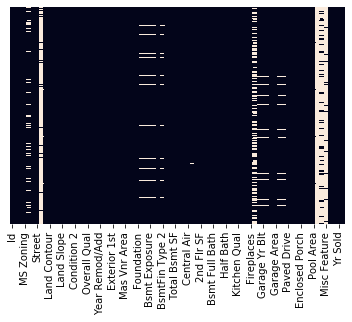

In [8]:
sns.heatmap(test_df.isnull(),yticklabels=False,cbar=False);

In [9]:
# https://www.gimme-shelter.com/frontage-50043/
# the lot frontage might be a main contributor to the price difference so considered to change null to median of same subclass and lot shape

test_df['Lot Frontage'] = test_df.groupby(['MS SubClass','Lot Shape'])['Lot Frontage'].transform(lambda x: x.fillna(x.median()))

In [10]:
# check if there is null remain in the Lot Frontage columns
test_df.loc[test_df['Lot Frontage'].isnull()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
188,193,903206120,75,RL,NaN,7793,Pave,NaN,IR1,Bnk,AllPub,Corner,Gtl,BrkSide,Norm,Norm,1Fam,2.5Unf,7,7,1922,2005,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,Gd,TA,No,BLQ,474,Unf,0,634,1108,GasA,TA,N,FuseA,1160,908,0,2068,0,0,1,1,3,1,Gd,8,Typ,1,Gd,Detchd,1928.0,Unf,1,315,TA,TA,Y,0,0,60,0,0,0,NaN,NaN,NaN,0,5,2010,WD
205,757,903475100,70,RM,NaN,5775,Pave,NaN,IR2,Bnk,AllPub,Corner,Mod,OldTown,Feedr,Norm,1Fam,2Story,6,7,1915,2002,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,483,483,GasA,Ex,Y,SBrkr,741,686,0,1427,0,0,1,0,3,1,Gd,7,Typ,0,NaN,Attchd,1915.0,Unf,1,379,TA,TA,Y,0,24,112,0,0,0,NaN,NaN,NaN,0,2,2009,WD


In [11]:
test_df['Lot Frontage'].fillna(test_df['Lot Frontage'].median(),inplace=True)

In [12]:
test_df['Alley'].unique()

array(['Grvl', nan, 'Pave'], dtype=object)

In [13]:
test_df['Alley'].fillna('NA',inplace=True)

In [14]:
test_df['Alley'].isnull().sum()

0

In [15]:
test_df['Mas Vnr Type'].value_counts()

None       534
BrkFace    250
Stone       81
BrkCmn      12
CBlock       1
Name: Mas Vnr Type, dtype: int64

In [16]:
test_df['Mas Vnr Type'].fillna('None',inplace=True)

In [17]:
test_df['Mas Vnr Area'].fillna(0.0,inplace=True)

In [18]:
test_df.loc[(test_df['Mas Vnr Area']>0) & (test_df['Mas Vnr Type']=='None')]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
383,442,528138010,20,RL,102.0,13514,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2008,2008,Hip,CompShg,VinylSd,VinylSd,None,285.0,Ex,TA,PConc,Ex,TA,No,GLQ,1142,Unf,0,632,1774,GasA,Ex,Y,SBrkr,1808,0,0,1808,1,0,2,0,3,1,Ex,7,Typ,1,Gd,Attchd,2008.0,Fin,3,850,TA,TA,Y,200,26,0,0,0,0,NaN,NaN,NaN,0,3,2009,WD
863,404,527451110,160,RM,24.0,2368,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,BrDale,Norm,Norm,TwnhsE,2Story,5,6,1970,1970,Gable,CompShg,HdBoard,HdBoard,None,312.0,TA,TA,CBlock,TA,TA,No,LwQ,765,Unf,0,0,765,GasA,TA,Y,SBrkr,765,600,0,1365,0,0,1,1,3,1,TA,7,Min1,0,NaN,Attchd,1970.0,Unf,2,440,TA,TA,Y,0,36,0,0,0,0,NaN,NaN,NaN,0,5,2009,WD


In [19]:
test_df.iloc[[383],27] = test_df.iloc[[383],27].replace(285.0,0.0)
test_df.iloc[[863],27] = test_df.iloc[[863],27].replace(312.0,0.0)

In [20]:
test_df.loc[(test_df['Bsmt Exposure'].isnull()) & (test_df['Bsmt Qual'].notnull())]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type


In [21]:
test_df['Bsmt Exposure'].isnull().sum()

25

In [22]:
test_df['Bsmt Exposure'].fillna('NA',inplace=True)

In [23]:
test_df['Bsmt Exposure'].unique()

array(['No', 'Av', 'NA', 'Mn', 'Gd'], dtype=object)

In [24]:
test_df.replace({'Bsmt Exposure':{'NA':1, 'No':2, 'Mn':3, 'Av':4, 'Gd':5}},inplace=True)

In [25]:
test_df['BsmtFin Type 1'].fillna('NA',inplace=True)

In [26]:
test_df['BsmtFin Type 2'].fillna('NA',inplace=True)

In [27]:
test_df.loc[test_df['Bsmt Cond'].isnull()].shape

(25, 80)

In [28]:
test_df['Bsmt Cond'].fillna('NA',inplace=True)

In [29]:
test_df['Bsmt Cond'].unique()

array(['TA', 'Gd', 'NA', 'Fa'], dtype=object)

In [30]:
test_df.replace({'Bsmt Cond':{'NA':1,'Po':2,'Fa':3,'TA':4,'Gd':5,'Ex':6}},inplace=True)

In [31]:
test_df['Bsmt Qual'].fillna('NA',inplace=True)

In [32]:
test_df['Bsmt Qual'].unique()

array(['Fa', 'Gd', 'TA', 'Ex', 'NA', 'Po'], dtype=object)

In [33]:
test_df.replace({'Bsmt Qual':{'NA':1,'Po':2,'Fa':3,'RA':4,'Gd':5,'Ex':6}},inplace=True)

In [34]:
test_df.loc[test_df['Electrical'].isnull()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
635,1578,916386080,80,RL,73.0,9735,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,5,4,2,Unf,0,Unf,0,384,384,GasA,Gd,Y,NaN,754,640,0,1394,0,0,2,1,3,1,Gd,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD


In [35]:
test_df['Electrical'].mode()

0    SBrkr
dtype: object

In [36]:
test_df['Electrical'].fillna('SBrkr',inplace=True)

In [37]:
test_df.loc[(test_df['Fireplace Qu'].isnull()) & (test_df['Fireplaces'] == 0)].shape

(422, 80)

In [38]:
test_df['Fireplace Qu'].fillna('NA',inplace=True)

In [39]:
test_df['Fireplace Qu'].unique()

array(['NA', 'Gd', 'Fa', 'TA', 'Po', 'Ex'], dtype=object)

In [40]:
test_df.replace({'Bsmt Qual':{'NA':1,'Po':2,'Fa':3,'TA':4,'Gd':5,'Ex':6}},inplace=True)

In [41]:
test_df.loc[(test_df['Garage Type'].notnull()) & (test_df['Garage Qual'].isnull())]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
765,1357,903426160,60,RM,57.0,8094,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2.5Unf,6,8,1910,1983,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,PConc,4,4,3,Rec,196,Unf,0,1046,1242,GasA,Gd,Y,SBrkr,1242,742,0,1984,0,0,2,0,5,1,TA,8,Typ,0,NA,Detchd,NaN,NaN,1,360,NaN,NaN,Y,64,0,180,0,0,0,NaN,MnPrv,Shed,1000,9,2008,WD


In [42]:
test_df.iloc[[765],[59]] = test_df.iloc[[765],[59]].replace('Detchd','NA') 

In [43]:
test_df.iloc[[765] ]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
765,1357,903426160,60,RM,57.0,8094,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2.5Unf,6,8,1910,1983,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,PConc,4,4,3,Rec,196,Unf,0,1046,1242,GasA,Gd,Y,SBrkr,1242,742,0,1984,0,0,2,0,5,1,TA,8,Typ,0,NA,NA,NaN,NaN,1,360,NaN,NaN,Y,64,0,180,0,0,0,NaN,MnPrv,Shed,1000,9,2008,WD


In [44]:
test_df['Garage Type'].isnull().sum()

44

In [45]:
test_df['Garage Type'].fillna('NA',inplace=True)

In [46]:
test_df['Garage Yr Blt'].fillna(0.0,inplace=True)
test_df['Garage Yr Blt'] = test_df['Garage Yr Blt'].astype(float)

In [47]:
test_df['Garage Finish'].fillna('NA',inplace=True)

In [48]:
test_df['Garage Cars'].fillna('NA',inplace=True)

In [49]:
test_df['Garage Qual'].fillna('NA',inplace=True)

In [50]:
test_df['Garage Qual'].unique()

array(['Po', 'TA', 'Fa', 'NA', 'Gd'], dtype=object)

In [51]:
test_df.replace({'Garage Qual':{'Na':1,'Po':2,'Fa':3,'TA':4,'Gd':5,'Ex':6}},inplace=True)

In [52]:
test_df['Garage Cond'].fillna('NA',inplace=True)

In [53]:
test_df['Garage Cond'].unique()

array(['Po', 'TA', 'NA', 'Fa', 'Gd', 'Ex'], dtype=object)

In [54]:
test_df.replace({'Garage Cond':{'NA':1,'Po':2,'Fa':3,'TA':4,'Gd':5,'Ex':6}},inplace=True)

In [55]:
test_df['Fence'].fillna('NA',inplace=True)

In [56]:
test_df['Pool QC'].fillna('NA',inplace=True)

In [57]:
test_df['Pool QC'].unique()

array(['NA', 'Ex', 'TA'], dtype=object)

In [58]:
test_df.replace({'Pool QC':{'NA':1,'Po':2,'Fa':3,'TA':4,'Gd':5,'Ex':6}},inplace=True)

In [59]:
#cross checking misc feature & misc value
test_df.loc[(test_df['Misc Feature'].isnull()) & (test_df['Misc Val'] != 0)].shape

(0, 80)

In [60]:
test_df['Misc Feature'].fillna('NA',inplace=True)

In [61]:
test_df['Exter Qual'].unique()

array(['TA', 'Gd', 'Fa', 'Ex'], dtype=object)

In [62]:
test_df.replace({'Exter Qual':{'NA':1,'Po':2,'Fa':3,'TA':4,'Gd':5,'Ex':6}},inplace=True)

In [63]:
test_df['Exter Cond'].unique()

array(['Fa', 'TA', 'Gd', 'Ex', 'Po'], dtype=object)

In [64]:
test_df.replace({'Exter Cond':{'NA':1,'Po':2,'Fa':3,'TA':4,'Gd':5,'Ex':6}},inplace=True)

In [65]:
test_df['Heating QC'].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [66]:
test_df.replace({'Heating QC':{'NA':1,'Po':2,'Fa':3,'TA':4,'Gd':5,'Ex':6}},inplace=True)

In [67]:
test_df['Kitchen Qual'].unique()

array(['Fa', 'TA', 'Gd', 'Ex', 'Po'], dtype=object)

In [68]:
test_df.replace({'Kitchen Qual':{'NA':1,'Po':2,'Fa':3,'TA':4,'Gd':5,'Ex':6}},inplace=True)

In [69]:
test_df['MS Zoning'].unique()

array(['RM', 'RL', 'FV', 'RH', 'C (all)', 'I (all)'], dtype=object)

In [70]:
#simplify the MS Zoning category
test_df.replace({'MS Zoning':{'C (all)': 'C', 'A (agr)': 'A', 'I (all)': 'I'}},inplace=True)

In [71]:
test_df.dtypes

Id                   int64
PID                  int64
MS SubClass          int64
MS Zoning           object
Lot Frontage       float64
Lot Area             int64
Street              object
Alley               object
Lot Shape           object
Land Contour        object
Utilities           object
Lot Config          object
Land Slope          object
Neighborhood        object
Condition 1         object
Condition 2         object
Bldg Type           object
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual           int64
Exter Cond           int64
Foundation          object
Bsmt Qual            int64
Bsmt Cond            int64
Bsmt Exposure        int64
BsmtFin Type 1      object
BsmtFin SF 1         int64
BsmtFin Type 2      object
B

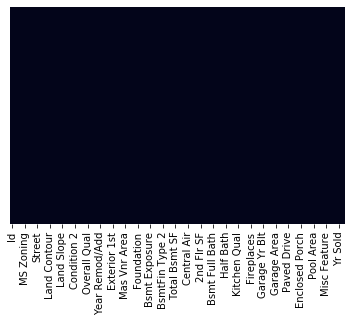

In [72]:
sns.heatmap(test_df.isnull(),yticklabels=False,cbar=False);

In [73]:
test_df.isnull().sum().sort_values(ascending=False).head(30)

Sale Type         0
Yr Sold           0
Year Remod/Add    0
Roof Style        0
Roof Matl         0
Exterior 1st      0
Exterior 2nd      0
Mas Vnr Type      0
Mas Vnr Area      0
Exter Qual        0
Exter Cond        0
Foundation        0
Bsmt Qual         0
Bsmt Cond         0
Bsmt Exposure     0
BsmtFin Type 1    0
BsmtFin SF 1      0
BsmtFin Type 2    0
BsmtFin SF 2      0
Year Built        0
Overall Cond      0
Overall Qual      0
Lot Shape         0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage      0
Lot Area          0
Street            0
Alley             0
dtype: int64

In [74]:
# export file
test_df.to_csv('../datasets/test_clean.csv', index=False)